# **Anoynmous Company Analysis**

![](http://2.bp.blogspot.com/-CzdiuBOh8J4/UBq4Jyc9xKI/AAAAAAAAACs/YufZIDKSMms/s1600/Anonymous-650x406.jpg)

Let's first import our libraries.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import xlrd
import datetime
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

We can now use pandas to read in our csv files.

In [2]:
videoCount = pd.read_csv('video_count.csv')
videoFeatures = pd.read_csv('video_features_modified.csv',
                             parse_dates=['video_upload_date'])

Let's have a look at our data's columns, types and entries.

In [3]:
videoCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 3 columns):
video_id    11903 non-null int64
date        11903 non-null int64
count       11903 non-null int64
dtypes: int64(3)
memory usage: 279.1 KB


* NOTE: We will turn these from int to datetime. They were stored in excel format.

In [4]:
videoCount['date'] = videoCount['date'].apply(lambda x: datetime.datetime(xlrd.xldate_as_tuple(x,datemode=0)[0],
                                                                          xlrd.xldate_as_tuple(x,datemode=0)[1],
                                                                          xlrd.xldate_as_tuple(x,datemode=0)[2]))

In [5]:
videoCount['date'].head()

0   2017-12-23
1   2017-12-15
2   2017-12-04
3   2017-12-25
4   2017-10-17
Name: date, dtype: datetime64[ns]

After fixing that, let's look at both our files again.

In [6]:
videoCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 3 columns):
video_id    11903 non-null int64
date        11903 non-null datetime64[ns]
count       11903 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 279.1 KB


In [7]:
videoFeatures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
video_id             100 non-null int64
video_length         100 non-null int64
video_language       100 non-null object
video_upload_date    100 non-null datetime64[ns]
video_quality        100 non-null object
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 4.0+ KB


First, let's look at the video features. We can visualize it by looking at a distribution plot and box plot.

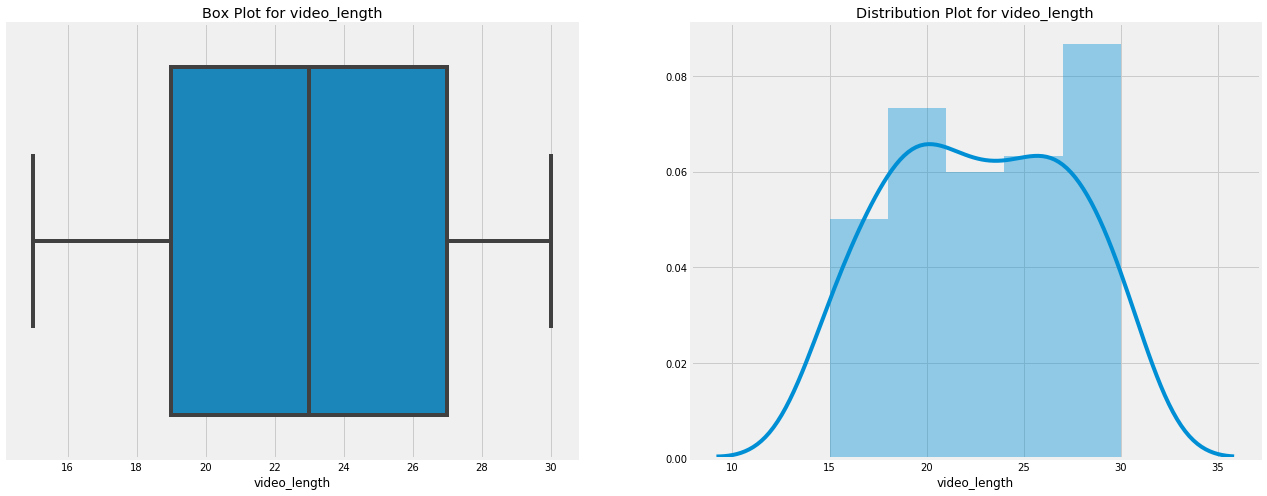

In [8]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=videoFeatures['video_length'],
           ax=axes[0])
sns.distplot(videoFeatures['video_length'],
           ax=axes[1])
axes[0].set_title('Box Plot for video_length')
axes[1].set_title('Distribution Plot for video_length');

On average, each video is about 23 seconds long with the second quantile being 19 seconds and the third quantile being 27 seconds. The data does not have any outliers present.
The distribution looks to be almost normal, but has a more bimodal look to it.

In [9]:
videoFeatures['video_length'].describe()

count    100.000000
mean      22.700000
std        4.606758
min       15.000000
25%       19.000000
50%       23.000000
75%       27.000000
max       30.000000
Name: video_length, dtype: float64

* NOTE: The data recorded under 'video_language' says 'chineese', instead of 'chinese' we can fix that.

In [10]:
videoFeatures['video_language'].value_counts()

chineese    35
english     33
spanish     32
Name: video_language, dtype: int64

In [11]:
videoFeatures['video_language'].replace({'chineese':'chinese'},inplace=True)

We have fixed 'chineesse' by replacing it with 'chinese'.

Let's now look at the column video_language.

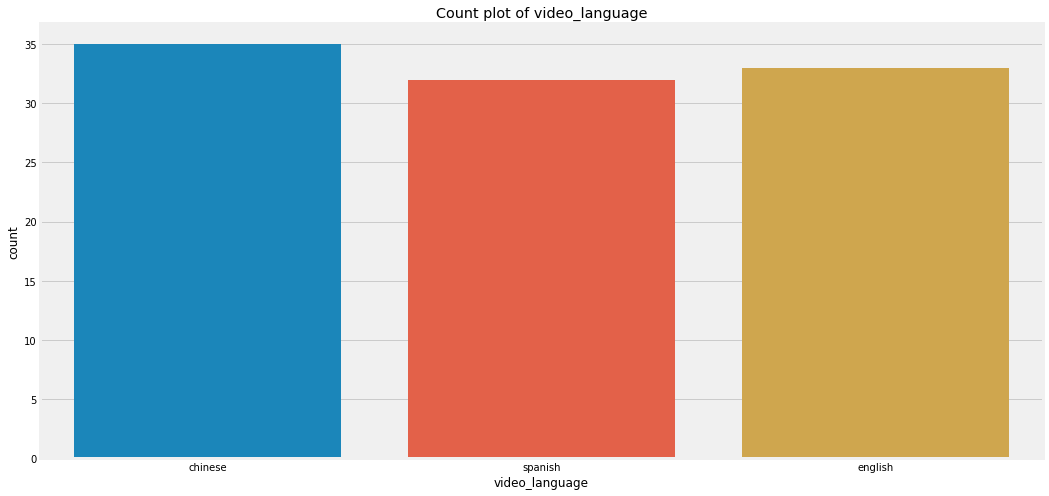

In [12]:
plt.figure(figsize=(16,8))
sns.countplot(x=videoFeatures['video_language'])
plt.title('Count plot of video_language');

There seems to be a fairly even distribution of the three languages in our 100 videos.

Let's now look at the column video_quality also.

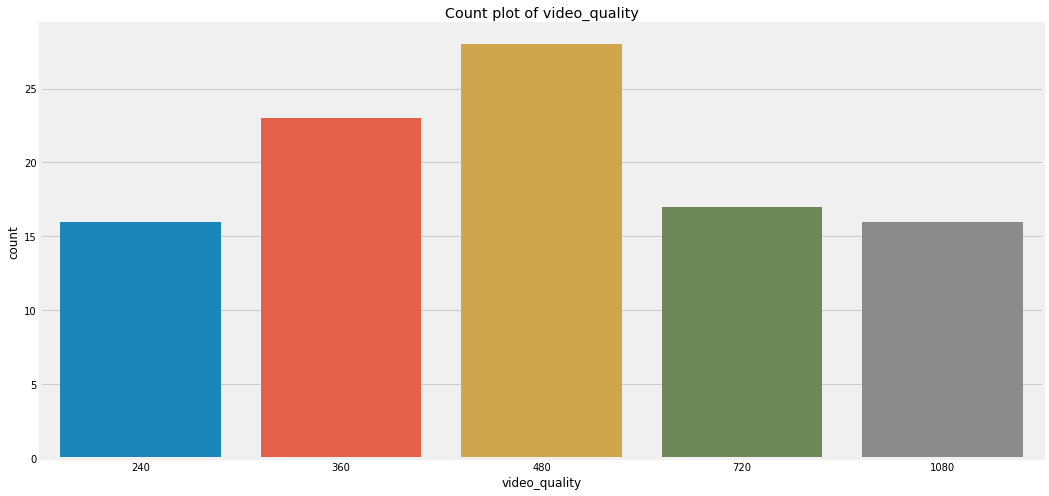

In [13]:
plt.figure(figsize=(16,8))
# The apply statement is to allow the sort from 240p-1080p
sns.countplot(x=videoFeatures['video_quality'].apply(lambda x: int(str(x)[:-1])).sort_values())
plt.title('Count plot of video_quality');

We can see here that the average video is in 480p and the next most common are 360p and 720p, followed by 240p and 1080p. There seems to be a positive skew, so more videos are in 240p and 360p than 720p and 1080p.

We can also plot video_upload_dates on a line plot to find a common trend or pattern. 

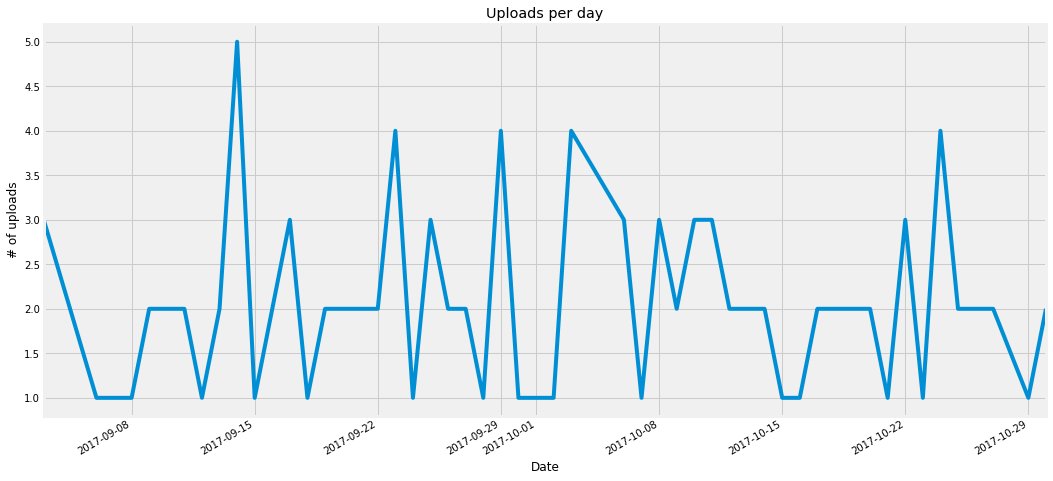

In [36]:
plt.figure(figsize=(16,8))
videoFeatures['video_upload_date'].value_counts().sort_index().plot.line()
plt.xlabel('Date')
plt.ylabel('# of uploads')
plt.title('Uploads per day');

From this line plot, I do not see any discernable patterns I can pick out.

Now that we have looked at each variable in video features, we can start to plot them against length to find some interesting patterns.

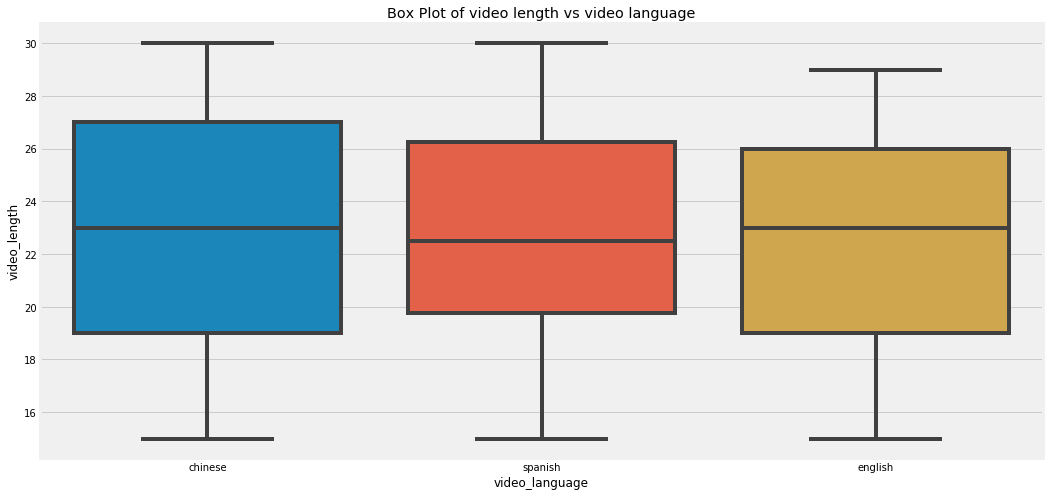

In [15]:
plt.figure(figsize=(16,8))
sns.boxplot(y='video_length',
            x='video_language',
            data=videoFeatures)
plt.title('Box Plot of video length vs video language');

The video lengths seem to not differ to greatly with language, but spanish videos are less varied, whereas english and chinese vary a bit more.

Let's look at video_length and video_quality now.

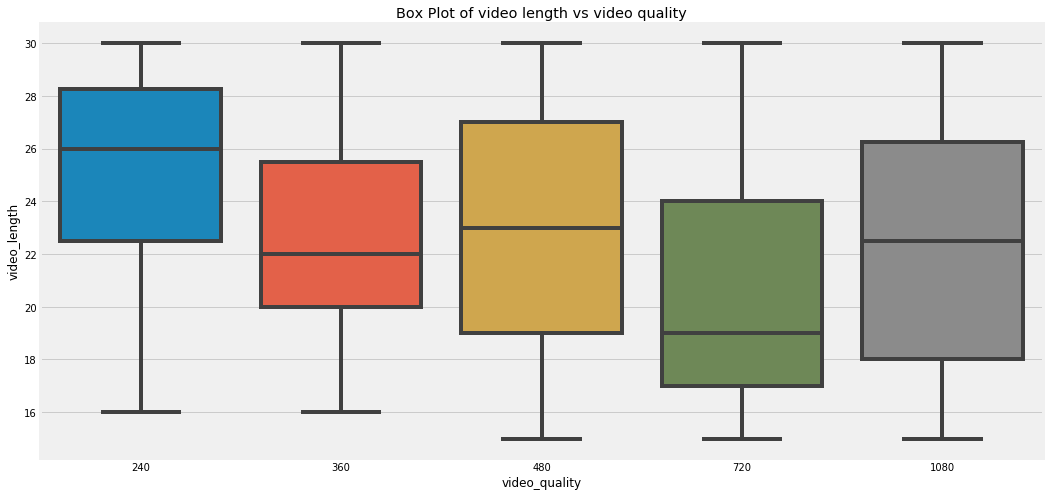

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(y=videoFeatures['video_length'],
            x=videoFeatures['video_quality'].apply(lambda x: int(str(x)[:-1])).sort_values())
plt.title('Box Plot of video length vs video quality');

We can see here that 240p videos seem to be much longer, on average, than other videos. Moreover, 720p videos seem to be much shorter, on average, than the others.

We now are moving on to the video count dataframe.

In [17]:
videoCount.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11903 entries, 0 to 11902
Data columns (total 3 columns):
video_id    11903 non-null int64
date        11903 non-null datetime64[ns]
count       11903 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 279.1 KB


We know that there are multiple entries for each video_id and date, therefore we can aggregate on these columns.

First, by grouping on the date column and taking the sum, we get the views per day.

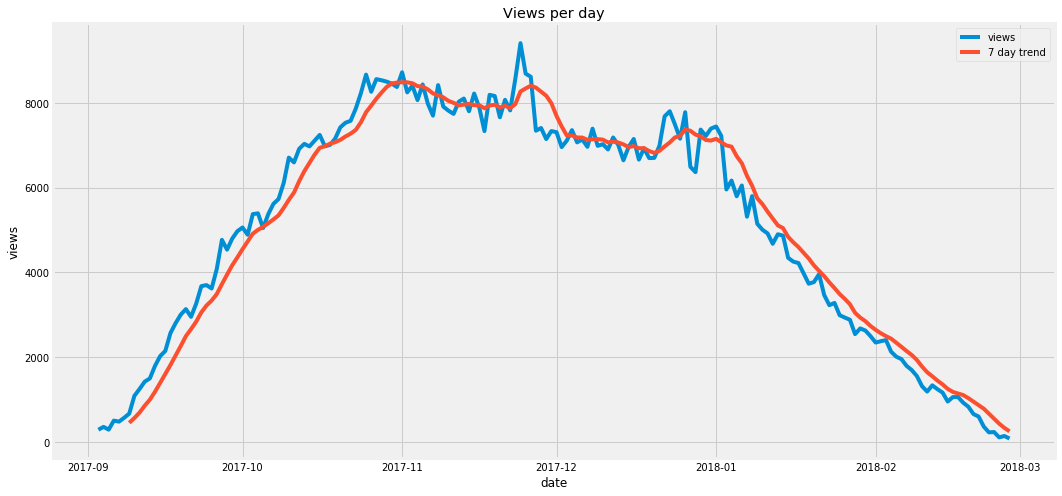

In [18]:
group_by_date = videoCount[['date','count']].groupby('date').sum().sort_index()

fig,axes = plt.subplots(1,1,figsize=(16,8))

sns.lineplot(x=group_by_date.index,
             y=group_by_date['count'],
            ax=axes,
            label='views')

sns.lineplot(x=group_by_date.index,
             y=group_by_date['count'].rolling(7).mean(),
            ax=axes,
            label='7 day trend')

plt.title('Views per day')
plt.ylabel('views');

From the plot above, we can see that there was a steady increase in views leading up to a significant spike in our data. The data then steadily decreases with another fairly significant spike.

We can now do the same for video_id, but we can aggregate the column and get the average of each video_id.

In [19]:
group_by_video_id = videoCount[['video_id','count']].groupby('video_id').mean().sort_values(by='count',ascending=False)
# We want to truncate data since 14.3 views doesn't really mean much.
group_by_video_id['count'] = group_by_video_id['count'].apply(lambda x: int(x))

# Reset the index and rename the column from count
group_by_video_id.reset_index(inplace=True)
group_by_video_id.columns = ['video_id','averageViewsPerDay']

Let's look at the box plot and distribution plot for our new variable averageViewsPerDay.

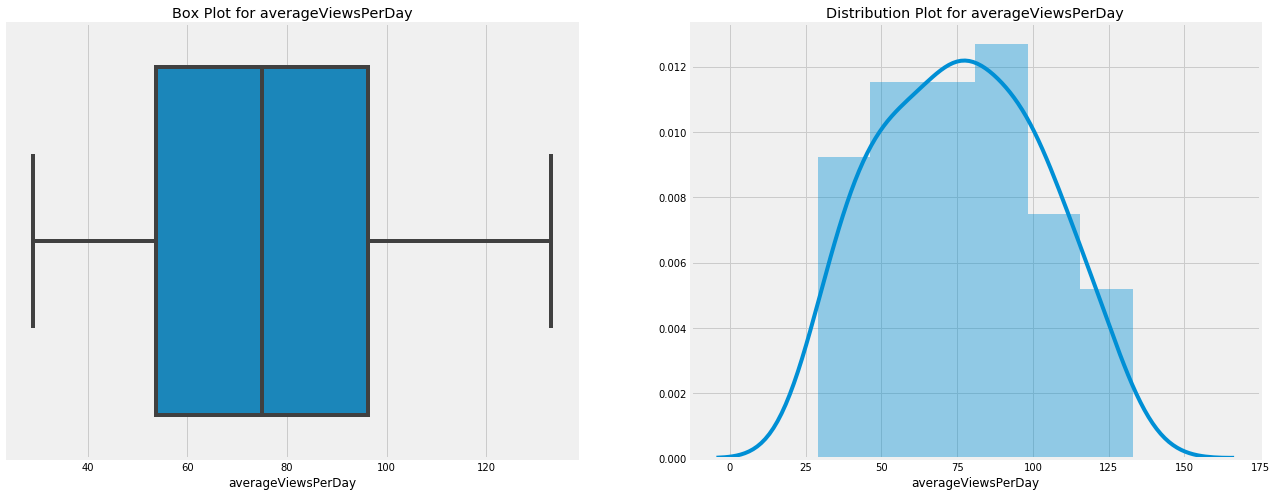

In [20]:
fig,axes=plt.subplots(1,2,figsize=(20,8))
sns.boxplot(x=group_by_video_id['averageViewsPerDay'],
           ax=axes[0])
sns.distplot(group_by_video_id['averageViewsPerDay'],
           ax=axes[1])
axes[0].set_title('Box Plot for averageViewsPerDay')
axes[1].set_title('Distribution Plot for averageViewsPerDay');

On average, each video has about 76 views with the second quantile being 53 views and the third quantile being 96 views. The data does not have any outliers present.
The distribution looks to be pretty normal.

In [21]:
group_by_video_id['averageViewsPerDay'].describe()

count    100.00000
mean      76.13000
std       26.41191
min       29.00000
25%       53.75000
50%       75.00000
75%       96.25000
max      133.00000
Name: averageViewsPerDay, dtype: float64

We can quickly look at the top 10 videos with the most average views.

In [22]:
group_by_video_id.head(10)

,video_id,averageViewsPerDay
0,57,133
1,74,122
2,84,122
3,52,122
4,4,121
5,44,121
6,82,121
7,51,118
8,93,118
9,54,111


We now have looked at all the columns, we can merge our two dataframes together on video_id.

In [23]:
videoFeaturesMerged = videoFeatures.merge(group_by_video_id,how='inner',on='video_id')
videoFeaturesMerged.reset_index(inplace=True,drop=True)

In [24]:
videoFeaturesMerged.head()

,video_id,video_length,video_language,video_upload_date,video_quality,averageViewsPerDay
0,1,16,chinese,2017-09-11,480p,111
1,2,27,spanish,2017-10-03,480p,52
2,3,30,spanish,2017-10-06,240p,29
3,4,15,spanish,2017-10-12,720p,121
4,5,19,chinese,2017-09-14,720p,103


Our new dataframe consists of averageViewsPerDay concatenated to our original video feature dataframe.

Now that we have video_length and a measure of each video's views, we can explore their relationship.

C:\Users\Justin\Anaconda3\envs\notebook2\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1152x576 with 0 Axes>

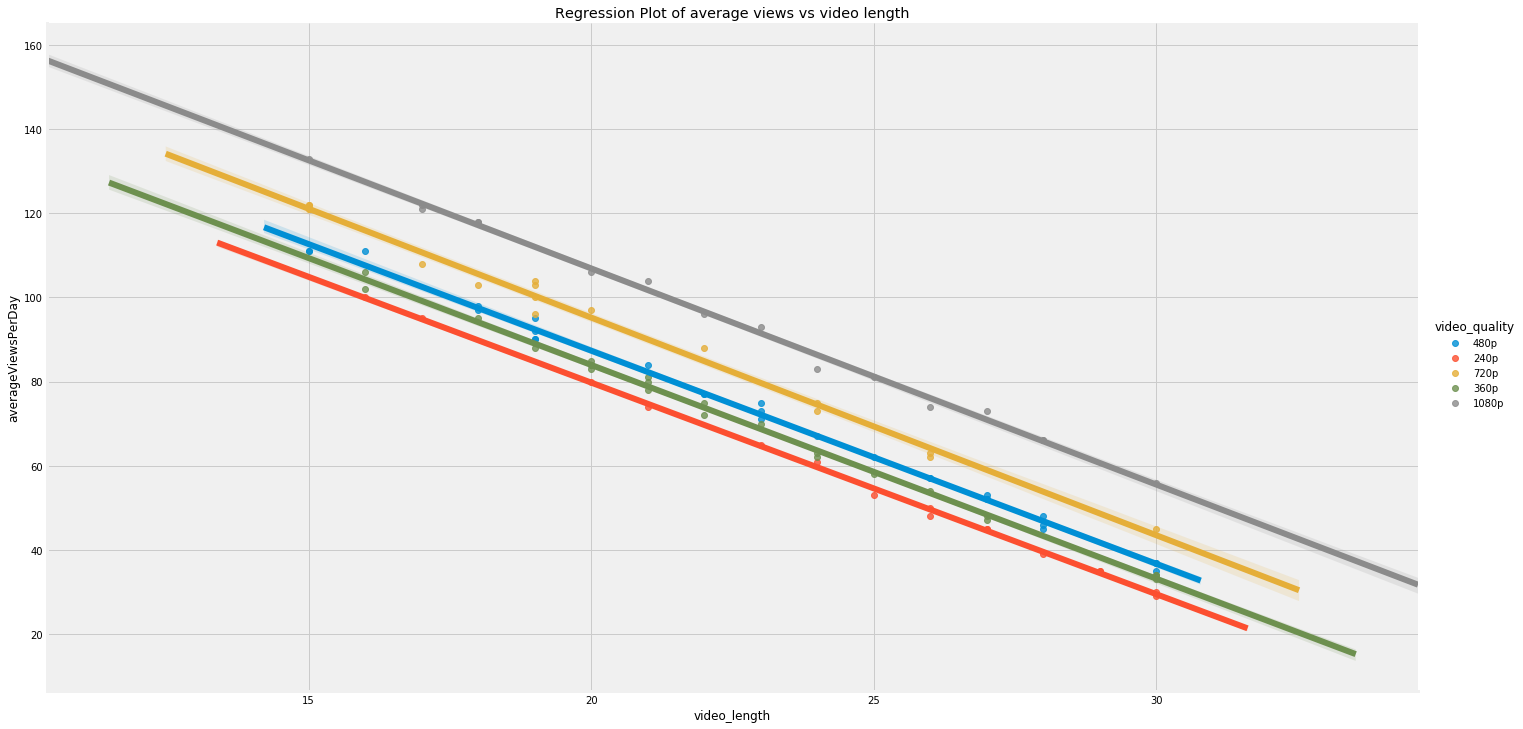

In [25]:
plt.figure(figsize=(16,8))

sns.lmplot(x='video_length',
           y='averageViewsPerDay',
           data=videoFeaturesMerged,
           hue='video_quality',
           size=10,
           aspect=2)
plt.title('Regression Plot of average views vs video length');

Through testing different linear plots with different qualitative hues, we see that this graph splits the data quite beautifully. Therefore, we can see that their is a negative linear relationship between average views and the length of a video. Moreover, the quality of video shows that as the quality of video increases the average views will also increase if length was held constant.

We will use average views to classify a video as hot, stable, or everything else. We will say anything greater the third quantile is hot and anything less than the second quantile is everything else. Moreover, anything that is in the 50% we will call stable and popular.

In [26]:
def classify_videos(df):
    
    secondQuartile = df['averageViewsPerDay'].describe()['25%']
    thirdQuartile = df['averageViewsPerDay'].describe()['75%']
    videoClassification = []
    
    for index,row in df.iterrows():
        if row['averageViewsPerDay'] < secondQuartile:
            videoClassification.append('Everything Else')
        elif row['averageViewsPerDay'] > thirdQuartile:
            videoClassification.append('Hot')
        else:
            videoClassification.append('Stable and Popular')
            
    df['videoClassification'] = videoClassification

In [27]:
classify_videos(videoFeaturesMerged)

Let's check to make sure that worked correctly.

In [28]:
videoFeaturesMerged['videoClassification'].value_counts()

Stable and Popular    50
Everything Else       25
Hot                   25
Name: videoClassification, dtype: int64

Now that we have done the classification, let's check out what we consider 'hot'.

In [29]:
videoFeaturesMerged[videoFeaturesMerged['videoClassification']=='Hot'].to_csv('Hot_videos.csv',index=False)

Let's dig deeper into what we already know with our regression plot.

We expect to have videos with short lengths and higher quality to be what we consider 'hot'.

In [30]:
videoFeaturesMerged[videoFeaturesMerged['videoClassification']=='Hot']['video_quality'].value_counts()

720p     10
1080p     7
480p      5
360p      2
240p      1
Name: video_quality, dtype: int64

Here, we see that the quality of hot videos seems to be fairly high.

In [31]:
videoFeaturesMerged[videoFeaturesMerged['videoClassification']=='Hot']['video_length'].value_counts()

15    7
18    5
16    4
19    3
17    3
20    2
21    1
Name: video_length, dtype: int64

Similarly, we see that the length of hot videos seems to be lower than the average of 23.

Therefore, we can conclude that video_length and video_quality are good predictors of a 'hot' video.

# Conclusion

Now that we have two good predictors (video_length, video_quality) of averageViewsPerDay, we can use this information to upload more relevant videos to the website. Currently, the website has a good majority of 240p and 360p videos. We should look to upload more videos with better quality. Moreover, we know that the longer the video is the less likely it is to be watched, so we should also focus on uploading shorter videos. The current average is 23 seconds, therefore I would recommend we try to keep videos below 23 seconds. 